In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pathlib import Path
from sklearn.model_selection import train_test_split

import tensorflow as tf
import os
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [23]:
train_df="/kaggle/input/surface-crack/train"
test_df="/kaggle/input/surface-crack/test"
valid_df="/kaggle/input/surface-crack/valid"

In [24]:
train_data = train_gen.flow_from_directory(
    train_df,
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,

 
)

val_data = train_gen.flow_from_directory(
    valid_df,
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True

   

)

test_data = train_gen.flow_from_directory(
    test_df,
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False,

    
)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,RMSprop, Adagrad

from keras.layers import BatchNormalization

In [26]:
 def random_invert_img(x, p=0.6):
    if tf.random.uniform([]) < p:
        x = (255 - x)
    else:
        x
    return x
 def random_inv(factor = 0.65):
    return tf.keras.layers.Lambda(lambda x:random_invert_img(x, factor)) 

In [27]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)


In [28]:
 initializer = tf.keras.initializers.HeUniform()

In [29]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x=tf.keras.layers.RandomContrast(0.2,0.4)
x=tf.keras.layers.RandomCrop(60,60)
x=tf.keras.layers.RandomRotation(0.2)
x=tf.keras.layers.RandomFlip("horizontal_and_vertical")
x=tf.keras.layers.RandomHeight(0.3)
x=tf.keras.layers.RandomWidth(0.1)
x=tf.keras.layers.RandomWidth(0.1)
x=tf.keras.layers.RandomZoom(0.1)
x=tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1,0.1)



x=random_inv()





x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.BatchNormalization()(x)


outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
x = tf.keras.layers.Dropout(0.5)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 120, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 128)       0   

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [31]:
filepath="we111ights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
callbacks_list = [checkpoint, es]

In [32]:


history = model.fit(train_data,validation_data=val_data,epochs = 100,callbacks=callbacks_list ,verbose=1,steps_per_epoch=len(train_data),
                           validation_steps=len(val_data))

Epoch 1/100
19/19 [==============================] - 2s 90ms/step - loss: 0.7730 - accuracy: 0.4850 - val_loss: 0.6872 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.68717, saving model to we111ights.best.hdf5
Epoch 2/100
19/19 [==============================] - 2s 88ms/step - loss: 0.5564 - accuracy: 0.7017 - val_loss: 0.5990 - val_accuracy: 0.5250

Epoch 00002: val_loss improved from 0.68717 to 0.59898, saving model to we111ights.best.hdf5
Epoch 3/100
19/19 [==============================] - 2s 88ms/step - loss: 0.4571 - accuracy: 0.7833 - val_loss: 0.5057 - val_accuracy: 0.6200

Epoch 00003: val_loss improved from 0.59898 to 0.50568, saving model to we111ights.best.hdf5
Epoch 4/100
19/19 [==============================] - 1s 78ms/step - loss: 0.4126 - accuracy: 0.8417 - val_loss: 0.4985 - val_accuracy: 0.5000

Epoch 00004: val_loss improved from 0.50568 to 0.49849, saving model to we111ights.best.hdf5
Epoch 5/100
19/19 [==============================] - 2s 80ms

In [33]:
fig = px.line( 
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
)

fig.show()

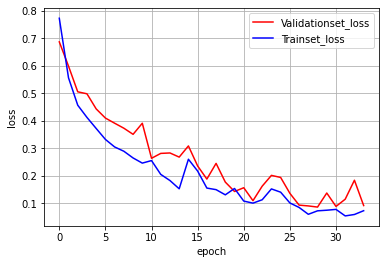

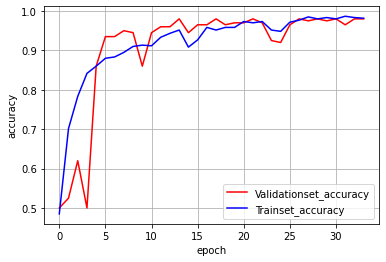

In [34]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, c = 'red', markersize = 3,label = 'Validationset_loss')
plt.plot(x_len, y_loss, c = 'blue', markersize = 3,label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, c = 'red', markersize = 3,label = 'Validationset_accuracy')
plt.plot(x_len, y_acc, c = 'blue', markersize = 3,label = 'Trainset_accuracy')
plt.legend(loc = 'lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [35]:
def evaluate_model(model, val_data):
    
    results = model.evaluate(val_data, verbose=0)
    loss = results[0]
    acc = results[1]
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
   
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    print("Classification Report:\n----------------------\n", clr)
                                                                        



**classifcation report for Test data**

In [36]:
evaluate_model(model, test_data)

    Test Loss: 0.25168
Test Accuracy: 93.50%
Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.88      1.00      0.94       100
    POSITIVE       1.00      0.87      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



**classifcation report for validation data**

In [37]:
evaluate_model(model, val_data)

    Test Loss: 0.08691
Test Accuracy: 98.00%
Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.88      1.00      0.94       100
    POSITIVE       1.00      0.87      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



True Negatives:  100
False Positives:  0
False Negatives:  13
True Positives:  87


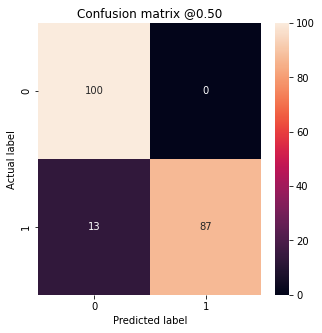

In [40]:
plot_cm(test_data.labels,  np.squeeze((model.predict(test_data) >= 0.5).astype(np.int)))
